In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## Для начала проведем некоторую обработку данных + подбор параметров для лучшей предсказательной модели.

In [2]:
dataset = pd.read_csv('train.csv', index_col=0, header=[0, 1])
dataset.rename(
    columns={
        'Unnamed: 209_level_1': 'count',
        'Unnamed: 210_level_1': 'price',
    },
    level = 1,
    inplace = True
)
dataset.head()

timestamp_second bid_price_0                                                \
                     nunique       mean   median       std     min     max   
0                          7  44.183379  44.1865  0.007340  44.171  44.190   
1                          1  44.190000  44.1900  0.000000  44.190  44.190   
2                          3  44.187467  44.1860  0.001767  44.186  44.190   
3                          3  44.181038  44.1860  0.006993  44.173  44.188   
4                          2  44.213095  44.2190  0.012474  44.188  44.219   

timestamp_second                 bid_quantity_0          ...  \
                   first    last            sum nunique  ...   
0                 44.171  44.190        25880.7       5  ...   
1                 44.190  44.190           76.7       1  ...   
2                 44.190  44.186          597.5       3  ...   
3                 44.186  44.188         2062.8       2  ...   
4                 44.188  44.219         6350.8       2  ...   

timestamp_second sell_trade_quantity                                    count  \
                             nunique mean median std min max first last count   
0                                  0  NaN    NaN NaN NaN NaN   NaN  NaN    66   
1                                  0  NaN    NaN NaN NaN NaN   NaN  NaN    13   
2                                  0  NaN    NaN NaN NaN NaN   NaN  NaN    15   
3                                  0  NaN    NaN NaN NaN NaN   NaN  NaN    52   
4                                  0  NaN    NaN NaN NaN NaN   NaN  NaN    21   

timestamp_second    price  
                    price  
0                 44.2005  
1                 44.2195  
2                 44.2195  
3                 44.2175  
4                 44.2060  

[5 rows x 210 columns]

In [3]:
dataset_test = pd.read_csv('test_public.csv', index_col=0, header=[0, 1])
dataset_test.rename(
    columns={
        'Unnamed: 209_level_1': 'count',
        'Unnamed: 210_level_1': 'price',
    },
    level = 1,
    inplace = True
)
dataset_test.head()

timestamp_second bid_price_0                                               \
                     nunique       mean  median       std     min     max   
1300000                    8  30.814385  30.814  0.002522  30.810  30.819   
1300001                    4  30.821468  30.820  0.002858  30.819  30.826   
1300002                    8  30.831167  30.833  0.002328  30.826  30.833   
1300003                   12  30.848835  30.843  0.015865  30.833  30.872   
1300004                    7  30.851372  30.860  0.013284  30.810  30.861   

timestamp_second                 bid_quantity_0          ...  \
                   first    last            sum nunique  ...   
1300000           30.810  30.819         6053.2       6  ...   
1300001           30.819  30.826         7911.8       9  ...   
1300002           30.826  30.833         9012.1       8  ...   
1300003           30.833  30.844        13234.6      12  ...   
1300004           30.844  30.835         7546.1       7  ...   

timestamp_second sell_trade_quantity                                    count  \
                             nunique mean median std min max first last count   
1300000                            0  NaN    NaN NaN NaN NaN   NaN  NaN    52   
1300001                            0  NaN    NaN NaN NaN NaN   NaN  NaN    47   
1300002                            0  NaN    NaN NaN NaN NaN   NaN  NaN    48   
1300003                            0  NaN    NaN NaN NaN NaN   NaN  NaN    91   
1300004                            0  NaN    NaN NaN NaN NaN   NaN  NaN    78   

timestamp_second    price  
                    price  
1300000           30.8295  
1300001           30.8380  
1300002           30.8500  
1300003           30.8605  
1300004           30.8720  

[5 rows x 210 columns]

In [4]:
pip install catboost

In [5]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [6]:
need_col_vol = [col for col in dataset.columns.tolist() if col[1] in ['sum','nunique','mean','std'] and col[0].find('price') == -1]

In [7]:
need_col_list = [
     ('buy_trade_price', 'count'),
     ('buy_trade_price', 'nunique'),
     ('sell_trade_price', 'count'),
     ('sell_trade_price', 'nunique'),
     ('count', 'count'),
     ('buy_trade_price_weight', ''),
     ('sell_trade_price_weight', ''),
     ('dif_trade_price_weight', ''),
     ('VolImbalance', ''),
     ('BAspread', ''),
     ('bid_price_3_minmax_dif', ''),
     ('bid_price_1_minmax_dif', ''),
     ('bid_price_0_minmax_dif', ''),
     ('bid_price_2_minmax_dif', ''),
     ('bid_price_4_minmax_dif', ''),
     ('ask_price_4_minmax_dif', ''),
     ('ask_price_1_minmax_dif', ''),
     ('ask_price_0_minmax_dif', ''),
     ('ask_price_3_minmax_dif', ''),
     ('ask_price_2_minmax_dif', ''),
     ('spread_1', ''),
     ('spread_2', ''),
     ('spread_3', ''),
     ('spread_4', ''),
     ('sum_dif_spread', ''),
     ('Vspread_0', ''),
     ('Vspread_1', ''),
     ('Vspread_2', ''),
     ('Vspread_3', ''),
     ('Vspread_4', ''),
     ('sum_dif_vspread_5', ''),
     ('sum_dif_vspread_1', ''),
     ('sum_dif_vspread_2', ''),
     ('sum_dif_vspread_3', ''),
     ('sum_dif_vspread_4', ''),
     ('bid_dif', ''),
     ('ask_dif', ''),
     ('bid_dif_0', ''),
     ('ask_dif_0', ''),
     ('bid_dif_1', ''),
     ('ask_dif_1', ''),
     ('bid_dif_2', ''),
     ('ask_dif_2', ''),
     ('bid_dif_3', ''),
     ('ask_dif_3', ''),
     ('ammount_dif0', ''),
     ('ammount_dif1', ''),
     ('ammount_dif2', ''),
     ('ammount_dif3', ''),
     ('ammount_dif4', ''),
     ('ammount_dif_5', ''),
     ('range_bid', ''),
     ('range_ask', ''),
     ('baratio_0', ''),
     ('paratio_0', ''),
     ('bratio', ''),
     ('buy_vol_count_ratio_0', ''),
     ('sell_vol_count_ratio_0', ''),
     ('baratio_1', ''),
     ('paratio_1', ''),
     ('buy_vol_count_ratio_1', ''),
     ('sell_vol_count_ratio_1', ''),
     ('baratio_2', ''),
     ('paratio_2', ''),
     ('buy_vol_count_ratio_2', ''),
     ('sell_vol_count_ratio_2', ''),
     ('baratio_3', ''),
     ('paratio_3', ''),
     ('buy_vol_count_ratio_3', ''),
     ('sell_vol_count_ratio_3', ''),
     ('baratio_4', ''),
     ('paratio_4', ''),
     ('buy_vol_count_ratio_4', ''),
     ('sell_vol_count_ratio_4', '')]

In [8]:
need_col_list_new = list(set(need_col_list + need_col_vol + [('buy_trade_price', 'std'),('sell_trade_price', 'std'),('buy_trade_dif',''),('sell_trade_dif',''),\
 ('buy_price_count_ratio',''),('buy_price_count_ratio','')]))


In [28]:
def new_batch_v5(X):
    y = X[('price','price')].copy()
    df = X.copy()
    col_na = ['count', 'nunique', 'mean', 'median', 'std', 'min', 'max']
    for el in col_na:
        df.loc[df[('buy_trade_quantity','count')] == 0,('buy_trade_quantity',el)] = 0
        df.loc[df[('sell_trade_quantity','count')] == 0,('sell_trade_quantity',el)] = 0
    df.loc[df[('sell_trade_quantity','count')] == 1,('sell_trade_quantity','std')] = 0
    df.loc[df[('sell_trade_price','count')] == 1,('sell_trade_price','std')] = 0
    df.loc[df[('buy_trade_quantity','count')] == 1,('buy_trade_quantity','std')] = 0
    df.loc[df[('buy_trade_price','count')] == 1,('buy_trade_price','std')] = 0
    df.loc[df[('sell_trade_quantity','count')] == 1,('sell_trade_quantity','std')] = 0
    df.loc[df[('sell_trade_price','count')] == 1,('sell_trade_price','std')] = 0
    df.loc[df[('buy_trade_quantity','count')] == 1,('buy_trade_quantity','std')] = 0
    df.loc[df[('buy_trade_price','count')] == 1,('buy_trade_price','std')] = 0
    df['buy_trade_price_weight'] = df[('buy_trade_price','mean')] * df[('buy_trade_quantity','sum')]
    df['sell_trade_price_weight'] = df[('sell_trade_price','mean')] * df[('sell_trade_quantity','sum')]
    df['dif_trade_price_weight']  = df['buy_trade_price_weight'] - df['sell_trade_price_weight'] 
    df['VolImbalance'] = df[('bid_quantity_0', 'sum')] / (df[('ask_quantity_0', 'sum')] + df[('bid_quantity_0', 'sum')])
    df['BAspread'] = df[('ask_price_0', 'mean')] - df[('bid_price_0', 'mean')]

    bid_price_list = ['bid_price_0', 'bid_price_1', 'bid_price_2', 'bid_price_3', 'bid_price_4']
    ask_price_list = ['ask_price_0', 'ask_price_1', 'ask_price_2', 'ask_price_3', 'ask_price_4']
    bid_quantity_list = ['bid_quantity_0','bid_quantity_1','bid_quantity_2','bid_quantity_3','bid_quantity_4']
    ask_quantity_list = ['ask_quantity_0','ask_quantity_1','ask_quantity_2','ask_quantity_3','ask_quantity_4']

    bid_list = ['bid_price_3', 'bid_price_1', 'bid_price_0', 'bid_price_2', 'bid_price_4']
    ask_list = ['ask_price_4', 'ask_price_1', 'ask_price_0', 'ask_price_3', 'ask_price_2']
    for el in bid_list:
        df[el + '_minmax_dif'] = df[(el,'max')] - df[(el,'min')]
    for el in ask_list:
        df[el + '_minmax_dif'] = df[(el,'max')] - df[(el,'min')]
    for i in range(1,5):
        df['spread_' + str(i)] = df[('ask_price_' + str(i),'mean')] - df[('bid_price_' + str(i),'mean')]
    df['sum_dif_spread'] = df.iloc[:,-5:].sum(axis=1)
    for i in range(5):
        df['Vspread_' + str(i)] = df[('ask_quantity_' + str(i),'sum')] - df[('bid_quantity_' + str(i),'sum')]
    df['sum_dif_vspread_5'] = df.iloc[:,-5:].sum(axis=1)
    dict_volume_cum_spread = {}
    for i in range(1,5):
        dict_volume_cum_spread['sum_dif_vspread_' + str(i)] = df.iloc[:,-6:-5+i].sum(axis=1)   
    for i in range(1,5):
        df['sum_dif_vspread_' + str(i)] = dict_volume_cum_spread['sum_dif_vspread_' + str(i)]   
    df['bid_dif'] = df[('bid_price_0','mean')] - df[('bid_price_4','mean')]
    df['ask_dif'] = df[('ask_price_4','mean')] - df[('ask_price_0','mean')]
    for i in range(4):
        df['bid_dif_' + str(i)] = abs(df[('bid_price_' + str(i),'mean')] - df[('bid_price_' + str(i + 1),'mean')])
        df['ask_dif_' + str(i)] = abs(df[('ask_price_' + str(i+1),'mean')] - df[('ask_price_' + str(i),'mean')])
    for i in range(len(bid_price_list)):
        df[bid_price_list[i] + 'ammount'] = df[(bid_price_list[i],'mean')] * df[(bid_quantity_list[i],'sum')]
        df[ask_price_list[i] + 'ammount'] = df[(ask_price_list[i],'mean')] * df[(ask_quantity_list[i],'sum')]

    for i in range(len(bid_price_list)):
        df['ammount_dif' + str(i)] = df[bid_price_list[i] + 'ammount'] - df[ask_price_list[i] + 'ammount']
    df['ammount_dif_5'] = df.iloc[:,-5:].sum(axis=1)
    dict_ammount_dif_cum_spread = {}
    for i in range(1,5):
        dict_ammount_dif_cum_spread['ammount_dif' + str(i)] = df.iloc[:,-6:-5+i].sum(axis=1)   
    for i in range(1,5):
        df['ammount_dif' + str(i)] = dict_ammount_dif_cum_spread['ammount_dif' + str(i)]
    df['range_bid'] = df[('bid_price_0','max')] - df[('bid_price_4','min')]
    df['range_ask'] = df[('ask_price_4','max')] - df[('ask_price_0','min')]
    df['buy_trade_dif'] = df[('buy_trade_price','max')] - df[('buy_trade_price','min')]
    df['sell_trade_dif'] = df[('sell_trade_price','max')] - df[('sell_trade_price','min')]


    for i in range(5):
        df['baratio_' + str(i)] = df[('bid_quantity_' + str(i),'sum')] / df[('ask_quantity_' + str(i),'sum')]
        df['paratio_' + str(i)] = df[('bid_price_' + str(i),'mean')] / df[('ask_price_' + str(i),'mean')]
        df['bratio'] = df[[('bid_quantity_' + str(i),'sum') for i in range(5)]].sum(axis=1) / df[[('ask_quantity_' + str(i),'sum') for i in range(5)]].sum(axis=1)
        df['buy_vol_count_ratio_' + str(i)] = df[('buy_trade_quantity','sum')] /  df[('count','count')]
        df['sell_vol_count_ratio_' + str(i)] = df[('sell_trade_quantity','sum')] /  df[('count','count')]
    df['buy_price_count_ratio'] = df[('buy_trade_price','count')] /  df[('count','count')]
    df['sell_price_count_ratio'] = df[('sell_trade_price','count')] /  df[('count','count')]
    df['ema_200'] = y.ewm(span=200).mean()
    df['ema_200_ratio'] = df['ema_200'] / y
    df['ema_80'] = y.ewm(span=80).mean()
    df['ema_80_ratio'] = df['ema_80'] / y
    df['delta_1'] = df['ema_200'] - y
    df['delta_2'] = df['ema_80'] - y
    df['delta_3'] = df['ema_200'] - df['ema_80'] 
    df['delta_1_ratio'] = df['delta_1'] / y
    df['delta_2_ratio'] = df['delta_2'] / y
    df['delta_3_ratio'] = df['delta_3'] / df['ema_80'] 
    df['pct_1'] = y.pct_change(1)
    df['mean_60_pct_1'] = df['pct_1'].rolling(window=60).mean()
    df['mean_10_pct_1'] = df['pct_1'].rolling(window=10).mean()
    df['pct_60'] = y.pct_change(60)
    df['dif_60'] = y - y.shift(60)
    df['dif_1'] = y - y.shift(1)
    df['price'] = y
    df['shift_price'] = y.shift(-60)
    df['dif_price'] = (y.shift(-60) - y)
    df['log_dif_price'] = (np.log(y.shift(-60) / y))
    df['bid_price_0_shift'] = df[('bid_price_0','max')].shift(-60)
    df['ask_price_0_shift'] = df[('ask_price_0','min')].shift(-60)
    df['bid_price_0_shift_v2'] = df[('bid_price_0','first')].shift(-60)
    df['ask_price_0_shift_v2'] = df[('ask_price_0','first')].shift(-60)
    df['price_shift_max'] = y.rolling(window=60).max().shift(-60)
    df['price_shift_min'] = y.rolling(window=60).min().shift(-60)
    new_columns = ['ema_200','ema_200_ratio','ema_80','ema_80_ratio','delta_1','delta_2','delta_3','delta_1_ratio',\
                   'delta_2_ratio','delta_3_ratio','mean_60_pct_1','mean_10_pct_1','pct_60','pct_1',\
                   'dif_60','dif_1','shift_price','dif_price','log_dif_price']
    return df[need_col_list_new + [(el,'') for el in new_columns] + [('price','price')] + \
              [('bid_price_0','first'),('bid_price_0_shift_v2',''),('ask_price_0','first'),('ask_price_0_shift_v2',''),\
              ('price_shift_max',''),('price_shift_min','')]]





In [29]:
dataset_new5 = new_batch_v5(dataset)
dataset_test_new5 = new_batch_v5(dataset_test)

In [31]:
def get_pnl_v4(dataset_old,dataset_oot,train_ind,test_ind,params,T_list,type_='dif'):
    X_train = dataset_old.iloc[:,:127][dataset_old.index.isin(train_ind)]
    X_test = dataset_old.iloc[:,:127][dataset_old.index.isin(test_ind)]
    X_oot = dataset_oot.iloc[:,:127]
    
    y_old = dataset_old[('price','price')]
    y_old_60 = dataset_old[('shift_price','')]
    y_oot = dataset_oot[('price','price')]
    y_train = y_old[y_old.index.isin(train_ind)]
    y_test = y_old[y_old.index.isin(test_ind)]
    y_train_60 = y_old_60[y_old_60.index.isin(train_ind)]
    y_test_60 = y_old_60[y_old_60.index.isin(test_ind)]
    y_oot_60 = dataset_oot[('shift_price','')]
    
    y_dif = dataset_old[('dif_price','')] 
    y_dif_train = y_dif[dataset_old.index.isin(train_ind)]
    y_dif_test = y_dif[dataset_old.index.isin(test_ind)]
    y_dif_oot = dataset_oot[('dif_price','')] 
    
    y_log_dif =  dataset_old[('log_dif_price','')] 
    y_log_dif_train = y_log_dif[dataset_old.index.isin(train_ind)]
    y_log_dif_test = y_log_dif[dataset_old.index.isin(test_ind)]
    y_log_dif_oot = dataset_oot[('log_dif_price','')] 
    
    hitrate_train_1_list = []
    hitrate_test_1_list = []
    hitrate_oot_1_list = []


    
    param_dict = {'early_stopping_rounds' : 30,
                 'thread_count' : -1,
                  'loss_function' : 'RMSE'
                 }
    param_dict = dict(list(param_dict.items()) + params)
    estimator = CatBoostRegressor(**param_dict)
    if type_ == 'dif':
    # dif_ratio

        estimator.fit(X_train,y_dif_train,verbose=False) 
        y_train_pred = estimator.predict(X_train)
        y_test_pred = estimator.predict(X_test)
        y_oot_pred = estimator.predict(X_oot)
        y_train_pred_1 = y_train  + y_train_pred
        y_test_pred_1 = y_test  + y_test_pred
        y_oot_pred_1 = y_oot  + y_oot_pred
        
        df_train = pd.DataFrame({'pred':y_train_pred_1 - y_train,\
                                 'buy_true' :-dataset_old[dataset_old.index.isin(train_ind)][('ask_price_0','first')] + \
                                 dataset_old[dataset_old.index.isin(train_ind)][('bid_price_0_shift_v2','')],\
                                'sell_true' : dataset_old[dataset_old.index.isin(train_ind)][('bid_price_0','first')] - \
                                 dataset_old[dataset_old.index.isin(train_ind)][('ask_price_0_shift_v2','')]})
        df_test = pd.DataFrame({'pred':y_test_pred_1 - y_test,\
                                 'buy_true' :-dataset_old[dataset_old.index.isin(test_ind)][('ask_price_0','first')] + \
                                 dataset_old[dataset_old.index.isin(test_ind)][('bid_price_0_shift_v2','')],\
                                'sell_true' : dataset_old[dataset_old.index.isin(test_ind)][('bid_price_0','first')] - \
                                 dataset_old[dataset_old.index.isin(test_ind)][('ask_price_0_shift_v2','')]})
        df_oot = pd.DataFrame({'pred':y_oot_pred_1 - y_oot,\
                                 'buy_true' :-dataset_oot[('ask_price_0','first')] + \
                                 dataset_oot[('bid_price_0_shift_v2','')],\
                                'sell_true' : dataset_oot[('bid_price_0','first')] - \
                                 dataset_oot[('ask_price_0_shift_v2','')]})
    else : 

        estimator.fit(X_train,y_log_dif_train,verbose=False) 
        y_train_pred = estimator.predict(X_train)
        y_test_pred = estimator.predict(X_test)
        y_oot_pred = estimator.predict(X_oot)
        y_train_pred_1 = y_train * np.exp(y_train_pred)
        y_test_pred_1 = y_test * np.exp(y_test_pred)    
        y_oot_pred_1 = y_oot * np.exp(y_oot_pred)  
        df_train = pd.DataFrame({'pred':y_train_pred_1 - y_train,\
                                 'buy_true' :-dataset_old[dataset_old.index.isin(train_ind)][('ask_price_0','first')] + \
                                 dataset_old[dataset_old.index.isin(train_ind)][('bid_price_0_shift_v2','')],\
                                'sell_true' : dataset_old[dataset_old.index.isin(train_ind)][('bid_price_0','first')] - \
                                 dataset_old[dataset_old.index.isin(train_ind)][('ask_price_0_shift_v2','')]})
        df_test = pd.DataFrame({'pred':y_test_pred_1 - y_test,\
                                 'buy_true' :-dataset_old[dataset_old.index.isin(test_ind)][('ask_price_0','first')] + \
                                 dataset_old[dataset_old.index.isin(test_ind)][('bid_price_0_shift_v2','')],\
                                'sell_true' : dataset_old[dataset_old.index.isin(test_ind)][('bid_price_0','first')] - \
                                 dataset_old[dataset_old.index.isin(test_ind)][('ask_price_0_shift_v2','')]})
        df_oot = pd.DataFrame({'pred':y_oot_pred_1 - y_oot,\
                                 'buy_true' :-dataset_oot[('ask_price_0','first')] + \
                                 dataset_oot[('bid_price_0_shift_v2','')],\
                                'sell_true' : dataset_oot[('bid_price_0','first')] - \
                                 dataset_oot[('ask_price_0_shift_v2','')]})
    train_list = []
    test_list = []
    oot_list = []
    for T in T_list:
        
        df_train_T_stats = get_df_total_stats_v2(df_train,T)
        df_test_T_stats = get_df_total_stats_v2(df_test,T)
        df_oot_T_stats = get_df_total_stats_v2(df_oot,T)
        train_list.append(df_train_T_stats)
        test_list.append(df_test_T_stats)
        oot_list.append(df_oot_T_stats)
      
    return train_list,test_list,oot_list

In [38]:
def get_params_list(grid,ind_list):
    param_list = [[] for i in range(len(ind_list))]
    df_temp = grid.iloc[ind_list].copy()
    for i in range(df_temp.shape[0]):
        param_list[i].append(('iterations',df_temp.iloc[i,-7]))
        param_list[i].append(('depth',df_temp.iloc[i,-6]))
        param_list[i].append(('learning_rate',df_temp.iloc[i,-5]))
        param_list[i].append(('l2_leaf_reg',df_temp.iloc[i,-4]))
        param_list[i].append(('rsm',df_temp.iloc[i,-3]))
        param_list[i].append(('subsample',1))
        param_list[i].append(('min_data_in_leaf', 2000))

    return param_list     

In [39]:
param_list_1_2 = get_params_list(grid_upd_1,top_ind_1_2)
param_list_2_1 = get_params_list(grid_upd_2,top_ind_2_1)
param_list_2_2 = get_params_list(grid_upd_2,top_ind_2_2)

In [161]:
def get_stats_t_v4(dataset_old,dataset_oot,train_ind,test_ind,params,type_='dif'):
    X_train = dataset_old.iloc[:,:127][dataset_old.index.isin(train_ind)]
    X_test = dataset_old.iloc[:,:127][dataset_old.index.isin(test_ind)]
    X_oot = dataset_oot.iloc[:,:127]
    
    y_old = dataset_old[('price','price')]
    y_old_60 = dataset_old[('shift_price','')]
    y_oot = dataset_oot[('price','price')]
    y_train = y_old[y_old.index.isin(train_ind)]
    y_test = y_old[y_old.index.isin(test_ind)]
    y_train_60 = y_old_60[y_old_60.index.isin(train_ind)]
    y_test_60 = y_old_60[y_old_60.index.isin(test_ind)]
    y_oot_60 = dataset_oot[('shift_price','')]
    
    y_dif = dataset_old[('dif_price','')] 
    y_dif_train = y_dif[dataset_old.index.isin(train_ind)]
    y_dif_test = y_dif[dataset_old.index.isin(test_ind)]
    y_dif_oot = dataset_oot[('dif_price','')] 
    
    y_log_dif =  dataset_old[('log_dif_price','')] 
    y_log_dif_train = y_log_dif[dataset_old.index.isin(train_ind)]
    y_log_dif_test = y_log_dif[dataset_old.index.isin(test_ind)]
    y_log_dif_oot = dataset_oot[('log_dif_price','')] 
    

    
    param_dict = {'early_stopping_rounds' : 30,
                 'thread_count' : -1,
                  'loss_function' : 'RMSE'
                 }
    param_dict = dict(list(param_dict.items()) + params)
    estimator = CatBoostRegressor(random_state=42,**param_dict)
    if type_ == 'dif':
    # dif_ratio

        estimator.fit(X_train,y_dif_train,verbose=False) 
        y_train_pred = estimator.predict(X_train)
        y_test_pred = estimator.predict(X_test)
        y_oot_pred = estimator.predict(X_oot)
        y_train_pred_1 = y_train  + y_train_pred
        y_test_pred_1 = y_test  + y_test_pred
        y_oot_pred_1 = y_oot  + y_oot_pred
    else : 

        estimator.fit(X_train,y_log_dif_train,verbose=False) 
        y_train_pred = estimator.predict(X_train)
        y_test_pred = estimator.predict(X_test)
        y_oot_pred = estimator.predict(X_oot)
        y_train_pred_1 = y_train * np.exp(y_train_pred)
        y_test_pred_1 = y_test * np.exp(y_test_pred)    
        y_oot_pred_1 = y_oot * np.exp(y_oot_pred)  

    print(mse(y_train_60,y_train_pred_1),mse(y_test_60,y_test_pred_1),mse(y_oot_60,y_oot_pred_1))
    df_train = pd.DataFrame({'pred':y_train_pred_1 - y_train,'bid_price' : dataset_old[dataset_old.index.isin(train_ind)][('bid_price_0','first')],\
                          'ask_price' : dataset_old[dataset_old.index.isin(train_ind)][('ask_price_0','first')], 'true' :  dataset_old[dataset_old.index.isin(train_ind)][('dif_price','')],\
                                 'buy_true' :-dataset_old[dataset_old.index.isin(train_ind)][('ask_price_0','first')] + \
                                 dataset_old[dataset_old.index.isin(train_ind)][('bid_price_0_shift_v2','')],\
                                'sell_true' : dataset_old[dataset_old.index.isin(train_ind)][('bid_price_0','first')] - \
                                 dataset_old[dataset_old.index.isin(train_ind)][('ask_price_0_shift_v2','')]})
    df_test = pd.DataFrame({'pred':y_test_pred_1 - y_test,'bid_price' : dataset_old[dataset_old.index.isin(test_ind)][('bid_price_0','first')],\
                          'ask_price' : dataset_old[dataset_old.index.isin(test_ind)][('ask_price_0','first')], 'true' :  dataset_old[dataset_old.index.isin(test_ind)][('dif_price','')],\
                                 'buy_true' :-dataset_old[dataset_old.index.isin(test_ind)][('ask_price_0','first')] + \
                                 dataset_old[dataset_old.index.isin(test_ind)][('bid_price_0_shift_v2','')],\
                                'sell_true' : dataset_old[dataset_old.index.isin(test_ind)][('bid_price_0','first')] - \
                                 dataset_old[dataset_old.index.isin(test_ind)][('ask_price_0_shift_v2','')]})
    df_oot = pd.DataFrame({'pred':y_oot_pred_1 - y_oot,'bid_price' : dataset_oot[('bid_price_0','first')],\
                          'ask_price' : dataset_oot[('ask_price_0','first')], 'true' :  dataset_oot[('dif_price','')],\
                                 'buy_true' :-dataset_oot[('ask_price_0','first')] + \
                                 dataset_oot[('bid_price_0_shift_v2','')],\
                                'sell_true' : dataset_oot[('bid_price_0','first')] - \
                                 dataset_oot[('ask_price_0_shift_v2','')]})
    return  df_train,df_test,df_oot

## Подберем лучшие параметры

In [527]:
get_mse_boosting_df_v3(grid_upd_2_1)

train_1    test_1  htrain_1  htest_1   train_2    test_2  htrain_2  \
0  0.005621  0.006112    0.5359   0.5325  0.005622  0.006113    0.5356   
1  0.005621  0.006109    0.5357   0.5336  0.005620  0.006111    0.5358   
2  0.005621  0.006111    0.5357   0.5330  0.005621  0.006111    0.5358   
3  0.005620  0.006110    0.5359   0.5334  0.005620  0.006110    0.5358   
4  0.005627  0.006112    0.5348   0.5332  0.005627  0.006112    0.5351   

   htest_2  iter  depth    lr  l2  rsm     dif_1     dif_2  
0   0.5332   100      3  0.10   5  0.8 -0.000490 -0.000491  
1   0.5335   100      4  0.07   5  1.0 -0.000489 -0.000491  
2   0.5325   100      3  0.10   3  1.0 -0.000490 -0.000490  
3   0.5341   100      4  0.07   5  0.8 -0.000490 -0.000490  
4   0.5329   100      3  0.07   5  0.8 -0.000484 -0.000484

In [162]:
df_tr,df_tt,df_ot = get_stats_t_v4(dataset_new5,dataset_test_new5.iloc[200:-200],\
                   np.array([range(200 + 7500 * k,7500 * k + 6200) for k in range(173)]).flatten(),\
                   np.array([range(6200 + 7500 * k,7500 * k + 7700) for k in range(173)]).flatten(),param_list_2_1[1],type_='dif')

0.005620676749994442 0.00610948297817269 0.010233244648599264


In [363]:
def step_1_v2(df_bid_ask,y_pred,T=0.1,S=1,M=1000,C=0):
    df = pd.DataFrame({'pred':y_pred})
    df[['ask_price','bid_price']] = df_bid_ask
    fee_list = []
    timestamp_list = []
    trade_price_list = []
    side_list = []
    quantity_list = []
    M_value = 0
    df_current = df[abs(df.pred) > T].copy()
    ind_list_ = df_current.index
    for i in ind_list_:
    
        if df_current.loc[i,'pred'] > T and M_value <  M:
            try :
                cur_price = df_current.loc[i,'ask_price']
                next_price = df.loc[i+60,'bid_price']
                timestamp_list.append(i)
                trade_price_list.append(cur_price)
                side_list.append('buy')
                quantity_list.append(S)
                fee_list.append(trade_price_list[-1] * quantity_list[-1] * C)
                M_value +=1

                timestamp_list.append(i+60)
                trade_price_list.append(next_price)
                side_list.append('sell')
                quantity_list.append(S)
                fee_list.append(trade_price_list[-1] * quantity_list[-1] * C)

            except Exception:
                pass
        if df_current.loc[i,'pred'] < -T and M_value > -M:
            try :
                cur_price = df_current.loc[i,'bid_price']
                next_price = df.loc[i+60,'ask_price']
                timestamp_list.append(i)
                trade_price_list.append(cur_price)
                side_list.append('sell')
                quantity_list.append(S)
                fee_list.append(trade_price_list[-1] * quantity_list[-1] * C)
                M_value -=1

                timestamp_list.append(i+60)
                trade_price_list.append(next_price)
                side_list.append('buy')
                quantity_list.append(S)
                fee_list.append(trade_price_list[-1] * quantity_list[-1] * C)
            except Exception:
                pass
    df_new = pd.DataFrame({'timestamp' : timestamp_list, 'trade_price' : trade_price_list, 'trade_quantity' : quantity_list,\
                          'side' : side_list,'fee' : fee_list})   
    return df_new

In [123]:
def get_maxdown(list_):
    cur_sum = []
    sum_ = 0
    for el in list_:
        sum_ += el
        cur_sum.append(sum_)
        if sum_ < 0:
            sum_ = 0
    return max(cur_sum)   

In [184]:
def step_2_v4(df_bid_ask,y_pred,T=0.1,S=1,M=1000,C=0):
    df_pnl = step_1_v2(df_bid_ask,y_pred,T,S,M,C)
    if df_pnl.shape[0] == 0:
        return 0
    df_pnl['sign_side'] = df_pnl.side.apply(lambda x : -1 if x == 'sell' else 1)
    df_pnl['current_num'] = df_pnl.apply(lambda x : x.trade_quantity * x.sign_side  ,axis=1).cumsum()
    df_pnl['pnl'] = ((df_pnl['trade_price'] - df_pnl['trade_price'].shift(1))* df_pnl.current_num.shift(1)).fillna(0)
    df_pnl['pnl_fee'] = df_pnl['pnl'] - df_pnl['fee']
    df_pnl['pnl_fee_v2'] = df_pnl['pnl_fee'].rolling(2).sum()
    df_pnl['pnl_2'] = df_pnl['pnl'].cumsum()
    pnl_list = df_pnl.loc[1::2,'pnl_fee_v2']
    total_pnl =  pnl_list.sum()
    mean_pnl = pnl_list.mean()
    std_pnl = pnl_list.std()
    sharp_ratio = mean_pnl / std_pnl
    volume = (df_pnl.trade_price * df_pnl.trade_quantity).sum()
    trade_num = pnl_list.shape[0]
    positive_trade_ratio = (pnl_list > 0).sum() / trade_num
    max_drop_down = get_maxdown(-pnl_list)
    
    return dict(zip('total_pnl,mean_pnl,std_pnl,sharp_ratio,volume,trade_num,positive_trade_ratio,max_drop_down'.split(','),np.round([total_pnl,mean_pnl,std_pnl,sharp_ratio,volume,trade_num,positive_trade_ratio,max_drop_down],5)))
    

## Проделаем подбор параметров для максимизации PnL,Sharp на train,а также замер финального качества на test.

In [373]:
%%time
T_list = np.arange(0.01,0.11,0.001)
S = 1
C = 0
train_stats_list = []
test_stats_list = []
M_list = np.logspace(1,4,10)
for T_cur in T_list:
    T = T_cur
    for M_cur in M_list:
        M = M_cur
        try :
            test_stats = step_2_v4(df_tt[['ask_price','bid_price']],df_tt.pred,T,S,M,C)
            train_stats = step_2_v4(df_tr[['ask_price','bid_price']],df_tr.pred,T,S,M,C)
            
            train_stats_list.append([train_stats,T,M])
            test_stats_list.append([test_stats,T,M])
        except Exception:
            pass

CPU times: total: 19min 20s
Wall time: 19min 30s


In [508]:
def plot_stats(train_stats_list,test_stats_list,func_list,M=10000,C=0):
    train_stats_T = [train_stats_list[i] for i,el in enumerate(train_stats_list) if train_stats_list[i][-1] == M]
    test_stats_T = [test_stats_list[i] for i,el in enumerate(test_stats_list) if test_stats_list[i][-1] == M]
    stats_list = [train_stats_T,test_stats_T]
    n_size = len(stats_list) * len(func_list)
    fig, ax = plt.subplots(n_size, 1, figsize = [10, 5 * n_size])
    i = 0
    for l,el in enumerate(stats_list):
        for j,func in enumerate(func_list):
            
            if  l == 0:
                title_name = 'train '
            else:
                title_name = 'test '
            title_name = title_name + func
            max_ = max([el[i][0][func] for i in range(len(el))])
            min_ = min([el[i][0][func] for i in range(len(el))])
            ax[i].set_title(title_name,fontsize = 20)
            ax[i].plot([el[k][-2] for k in range(len(el))],\
                       [el[k][0][func] for k in range(len(el))],color='black', marker='.',label = f'{func},M={int(M)},C={round(C,5)}')
            ax[i].axhline(y = max_, color ="red", linestyle ="--",label = f'max {func} = {max_}')
            ax[i].legend()
            ax[i].set_xlabel('T')
            ax[i].set_ylabel(func)
           

            if func in ['total_pnl','volume','trade_num','max_drop_down']:
                ax[i].set_yscale('log')



            ax[i].grid(True)

            ax[i].set_xticks(np.arange(0.01,0.111,0.01))


            i+=1
    plt.tight_layout()
    plt.show()

In [515]:
def step_3(df_bid_ask,y_pred,T=0.1,S=1,M=1000,C=0):
    df_pnl = step_1_v2(df_bid_ask,y_pred,T,S,M,C)
    if df_pnl.shape[0] == 0:
        return 0
    df_pnl['sign_side'] = df_pnl.side.apply(lambda x : -1 if x == 'sell' else 1)
    df_pnl['current_num'] = df_pnl.apply(lambda x : x.trade_quantity * x.sign_side  ,axis=1).cumsum()
    df_pnl['pnl'] = ((df_pnl['trade_price'] - df_pnl['trade_price'].shift(1))* df_pnl.current_num.shift(1)).fillna(0)
    df_pnl['pnl_fee'] = df_pnl['pnl'] - df_pnl['fee']
    df_pnl['pnl_fee_v2'] = df_pnl['pnl_fee'].rolling(2).sum()
    df_pnl['pnl_v2'] = df_pnl['pnl'].rolling(2).sum()
    pnl_list = df_pnl.loc[1::2,'pnl_fee_v2']
    pnl_fee_cumsum = df_pnl.loc[1::2,'pnl_fee_v2'].cumsum()
    pnl_list_cumsum = df_pnl.loc[1::2,'pnl_v2'].cumsum()
    volume_cumsum = (df_pnl.trade_price * df_pnl.trade_quantity).cumsum()

    
    return pd.DataFrame({'pnl' : pnl_list,'pnl_cumsum':pnl_list_cumsum,'pnlfee_cumsum':pnl_fee_cumsum})
    

In [520]:
def plot_step_3(plot_type,df_bid_ask,y_pred,T=0.1,S=1,M=1000,C=0):
    df = step_3(df_bid_ask,y_pred,T,S,M,C)
    plt.figure(figsize=(10,5))
    if plot_type == 1:
        title_name = 'PnL cumsum'
        col = 'pnl_cumsum'
    elif plot_type == 2:
        title_name = 'PnL_fee cumsum'
        col ='pnlfee_cumsum'
    else:
        title_name = 'PnL hist'
        col = 'pnl'
    plt.title(title_name)
    if plot_type != 3:
        max_ = round(df[col].max(),3)
        plt.plot(np.arange(df[col].shape[0]),df[col],color='black', marker='.',label = f'pnl,M={M},C={round(C,5)}')
        plt.axhline(y = max_, color ="red", linestyle ="--",label = f'max PnL = {max_}')
        plt.legend()
        plt.grid()
        plt.ylabel('Number of trade')
        plt.xlabel('PnL')
        plt.show()
    else :
        plt.hist(df[col],color='red',edgecolor='black',label = f'pnl,M={M},C={round(C,5)}',alpha=0.5,bins=12)
        plt.legend()
        plt.grid()
        plt.xlabel('PnL')
        plt.show()



## Подберем оптимальные параметры стратеги на train и проверим на test.

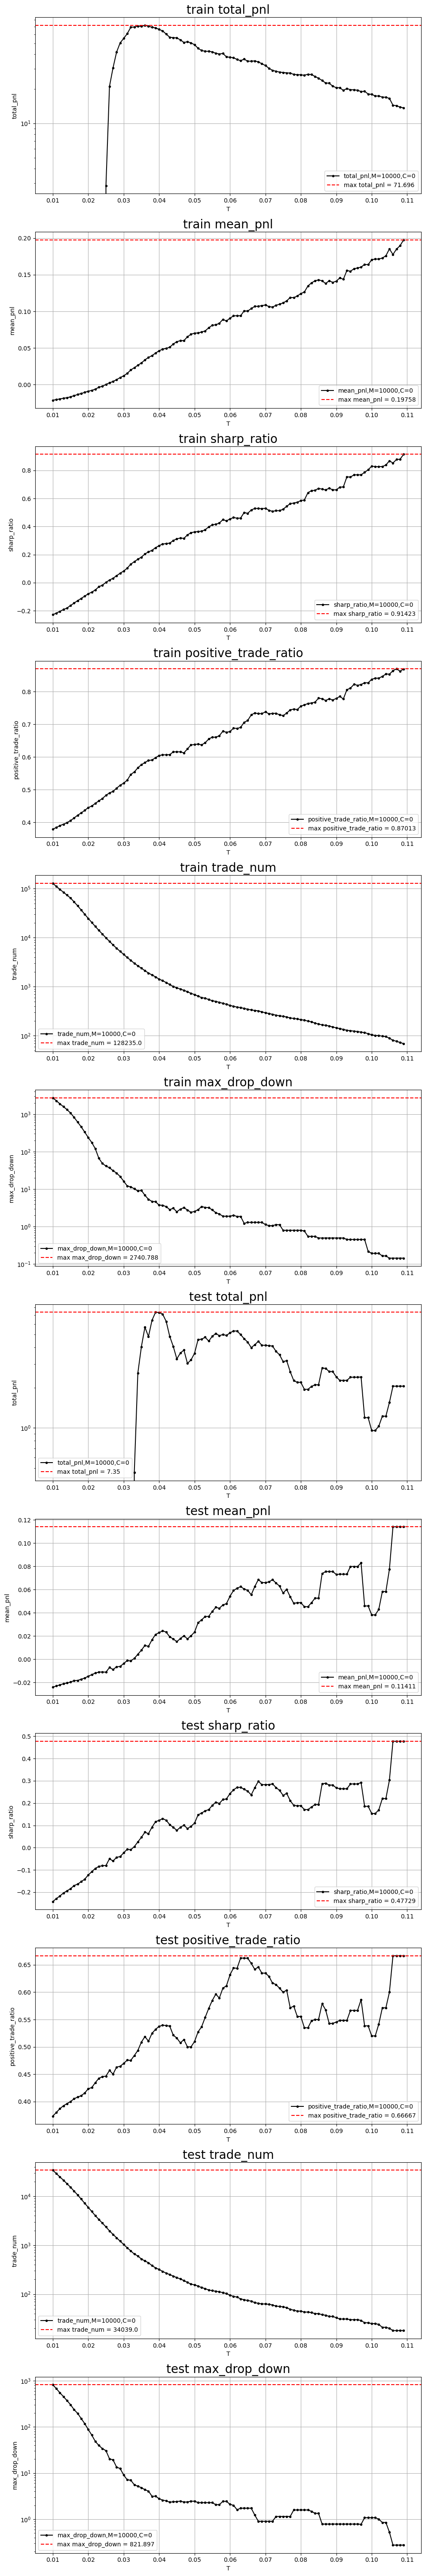

In [479]:
plot_stats(train_stats_list,test_stats_list,['total_pnl','mean_pnl','sharp_ratio','positive_trade_ratio','trade_num',\
                                            'max_drop_down'],M=10000,C=0)

## Видим, что с ростом порога T, увеличивается среднее PnL, коэф-т Шарпа, и доля угаданных направления движения цены. Но на test'е не следует брать самый максимум по порогу, так как выборка значительно меньше и может не существовать элементов выборки, у которых предсказание больше заданного порога. Поэтому остановимся на значении вблизи 0.09 - 0.1, например, 0.09

In [504]:
step_2_v4(df_tr[['ask_price','bid_price']],df_tr.pred,T=0.09,M=10000,C=0)

{'total_pnl': 20.469,
 'mean_pnl': 0.14117,
 'std_pnl': 0.21347,
 'sharp_ratio': 0.6613,
 'volume': 10402.565,
 'trade_num': 145.0,
 'positive_trade_ratio': 0.77931,
 'max_drop_down': 0.497}

In [511]:
step_2_v4(df_tt[['ask_price','bid_price']],df_tt.pred,T=0.09,M=10000,C=0.07/100)

{'total_pnl': 0.80021,
 'mean_pnl': 0.02425,
 'std_pnl': 0.27354,
 'sharp_ratio': 0.08865,
 'volume': 2301.131,
 'trade_num': 33.0,
 'positive_trade_ratio': 0.45455,
 'max_drop_down': 1.21068}

In [505]:
step_2_v4(df_tt[['ask_price','bid_price']],df_tt.pred,T=0.09,M=10000,C=0)

{'total_pnl': 2.411,
 'mean_pnl': 0.07306,
 'std_pnl': 0.2723,
 'sharp_ratio': 0.26831,
 'volume': 2301.131,
 'trade_num': 33.0,
 'positive_trade_ratio': 0.54545,
 'max_drop_down': 0.785}

## Поставим ограничение на кол-во сделок М.

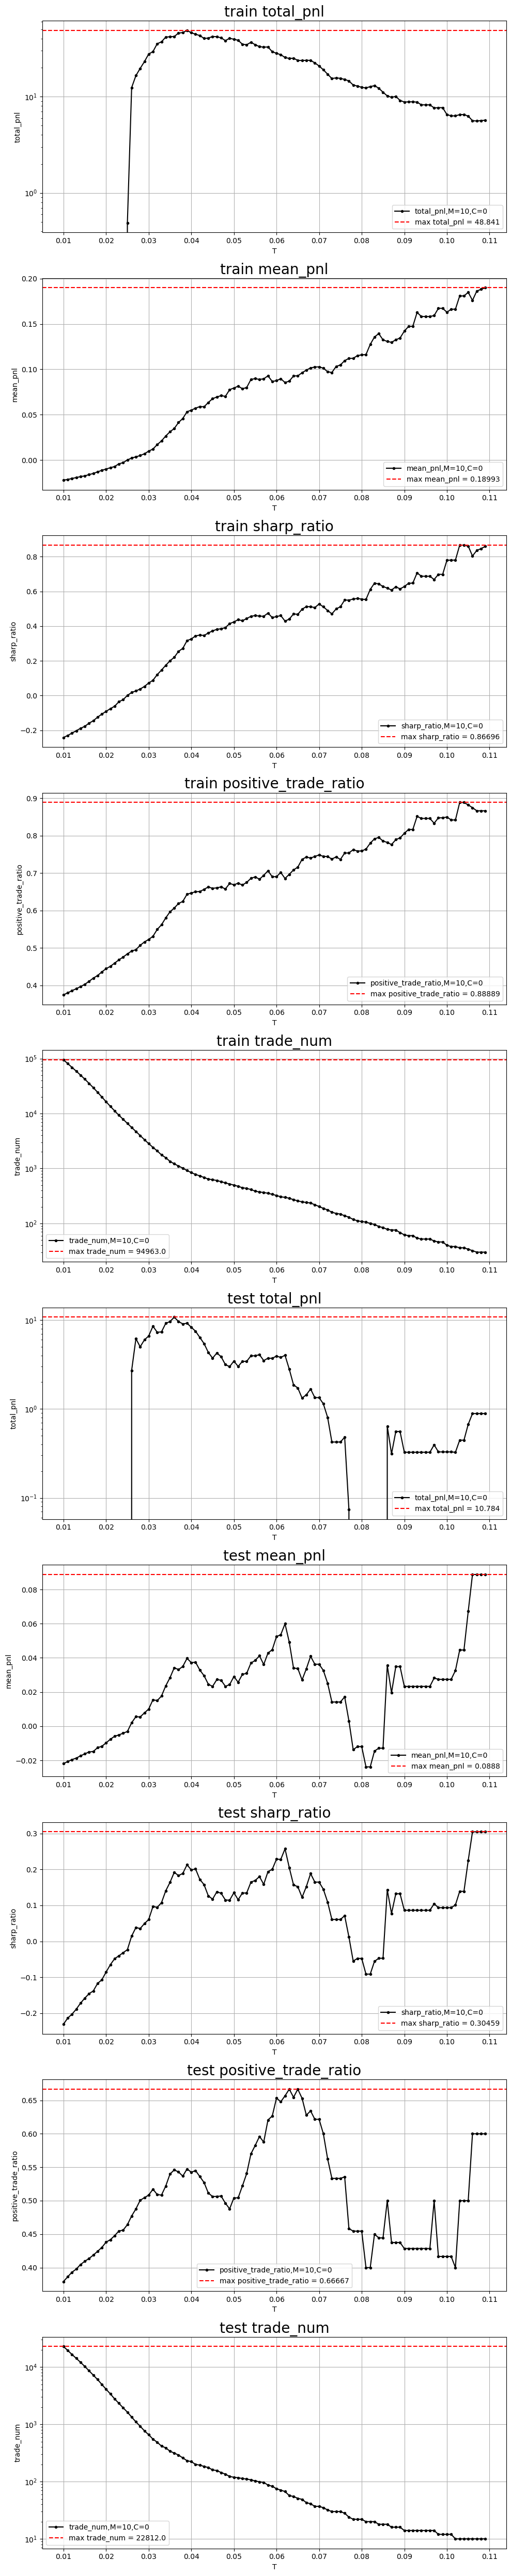

In [493]:
plot_stats(train_stats_list,test_stats_list,['total_pnl','mean_pnl','sharp_ratio','positive_trade_ratio','trade_num'],M=M_list[0],C=0)

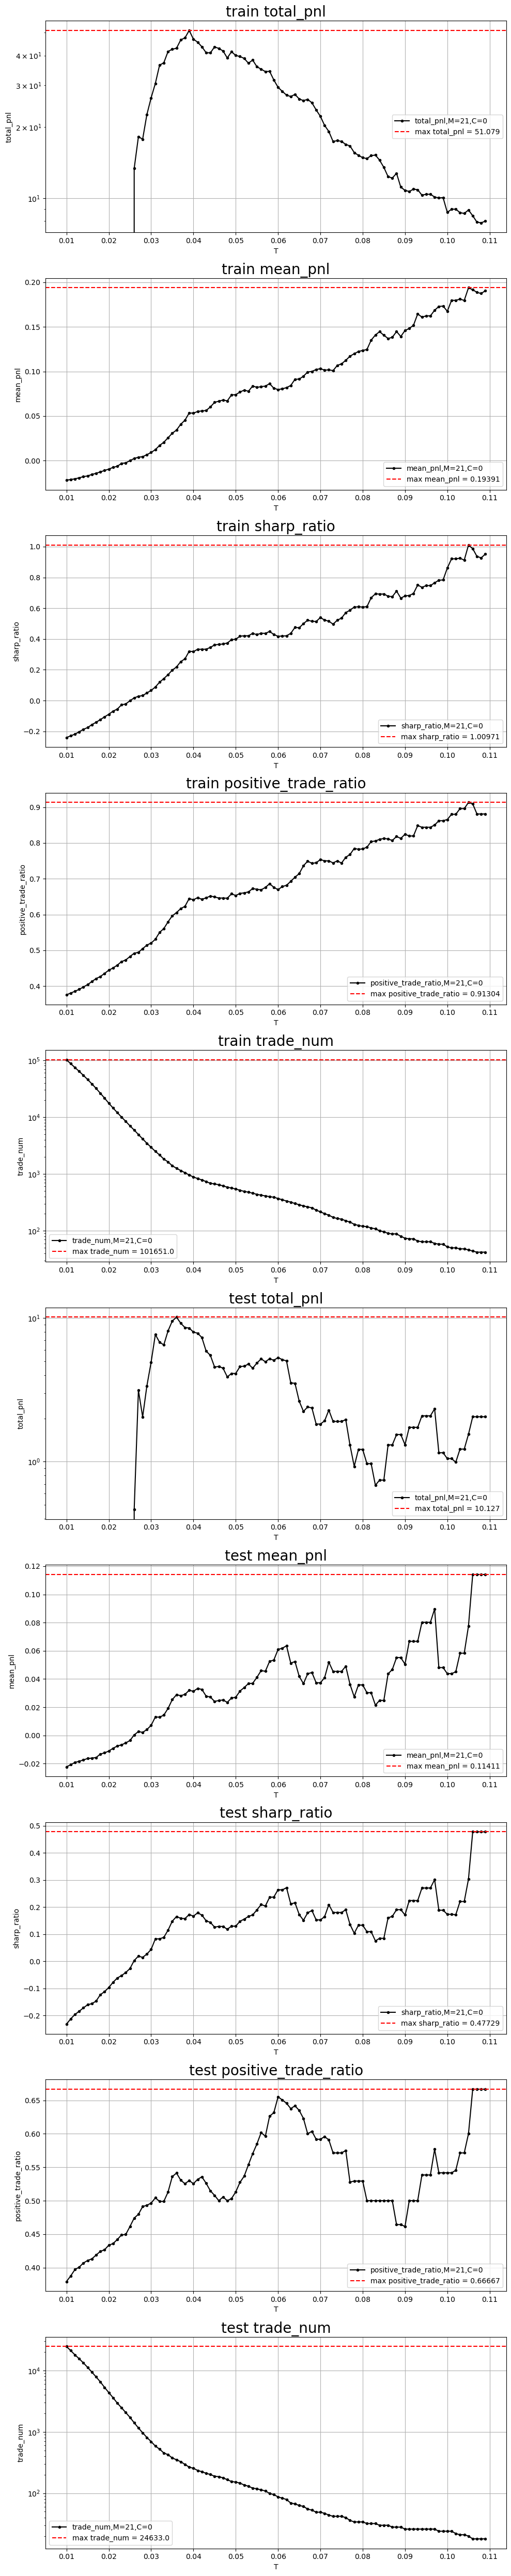

In [475]:
plot_stats(train_stats_list,test_stats_list,['total_pnl','mean_pnl','sharp_ratio','positive_trade_ratio','trade_num'],M=M_list[1],C=0)

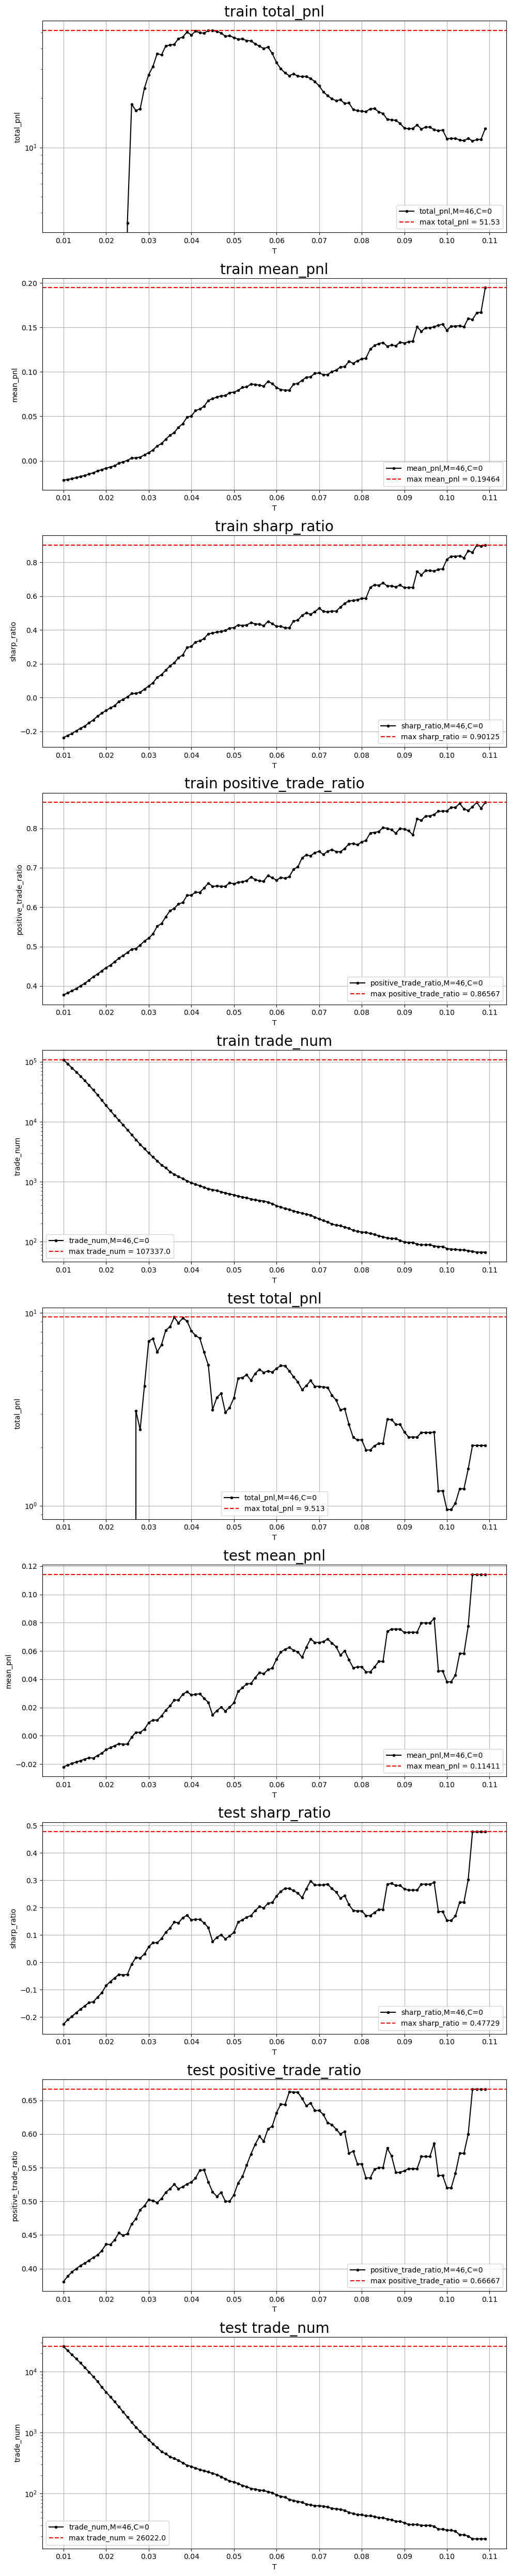

In [494]:
plot_stats(train_stats_list,test_stats_list,['total_pnl','mean_pnl','sharp_ratio','positive_trade_ratio','trade_num'],M=M_list[2],C=0)

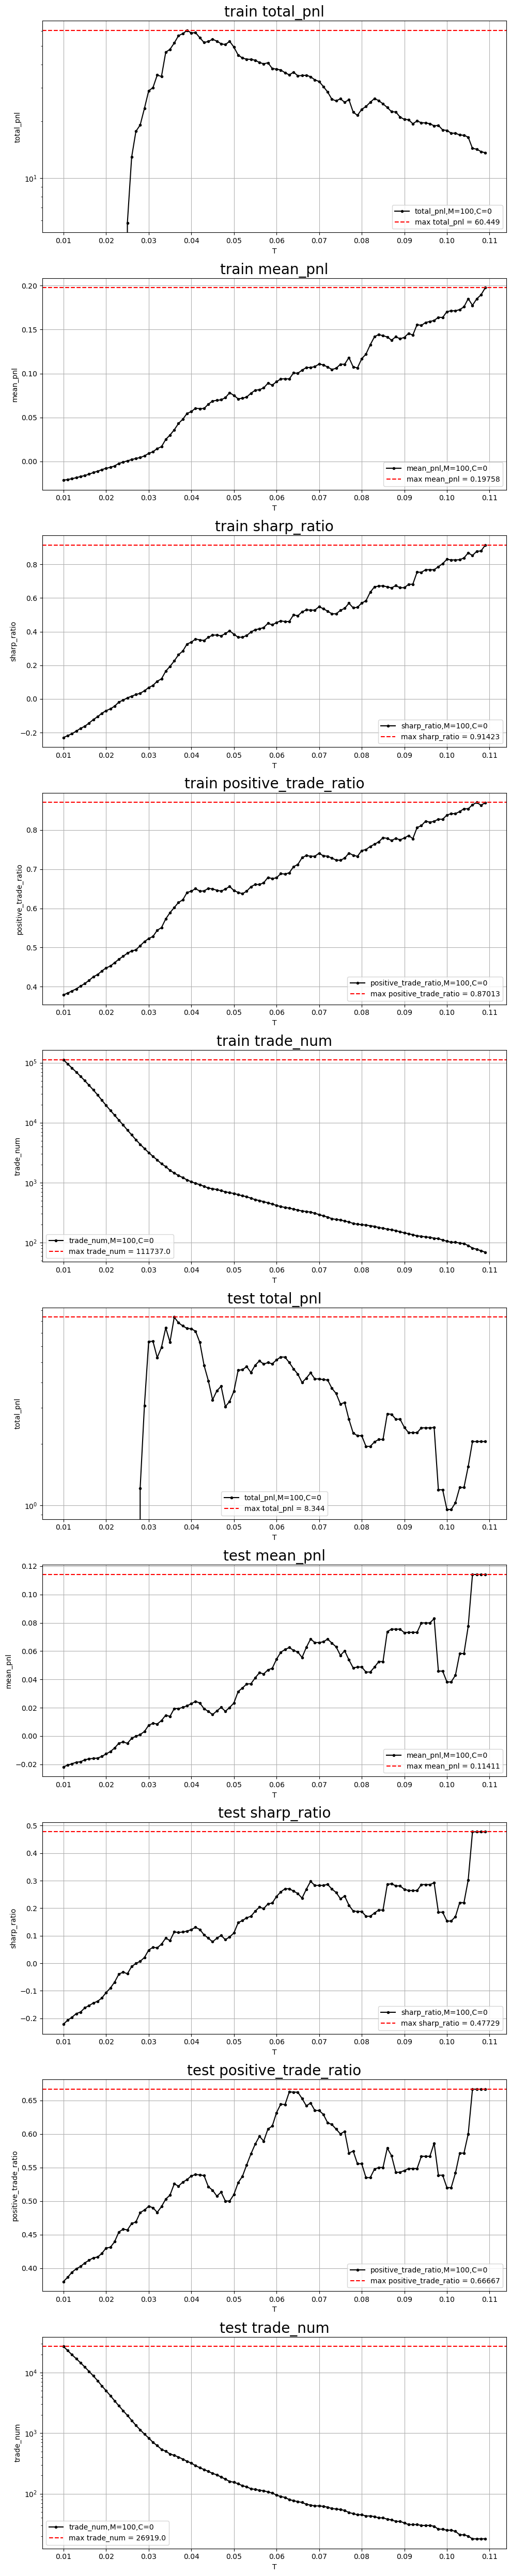

In [495]:
plot_stats(train_stats_list,test_stats_list,['total_pnl','mean_pnl','sharp_ratio','positive_trade_ratio','trade_num'],M=M_list[3],C=0)

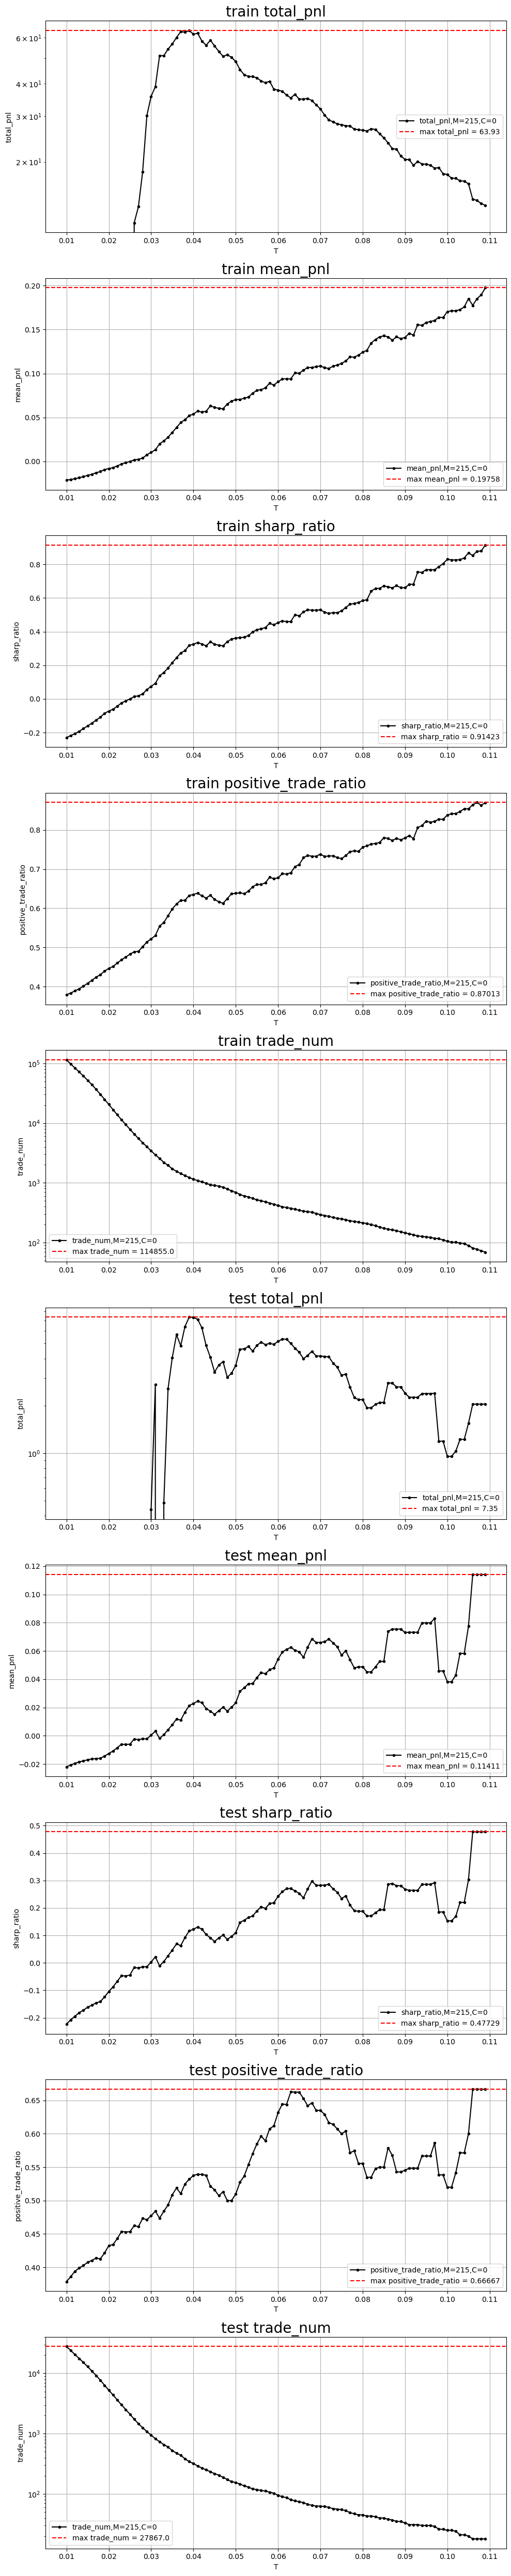

In [496]:
plot_stats(train_stats_list,test_stats_list,['total_pnl','mean_pnl','sharp_ratio','positive_trade_ratio','trade_num'],M=M_list[4],C=0)

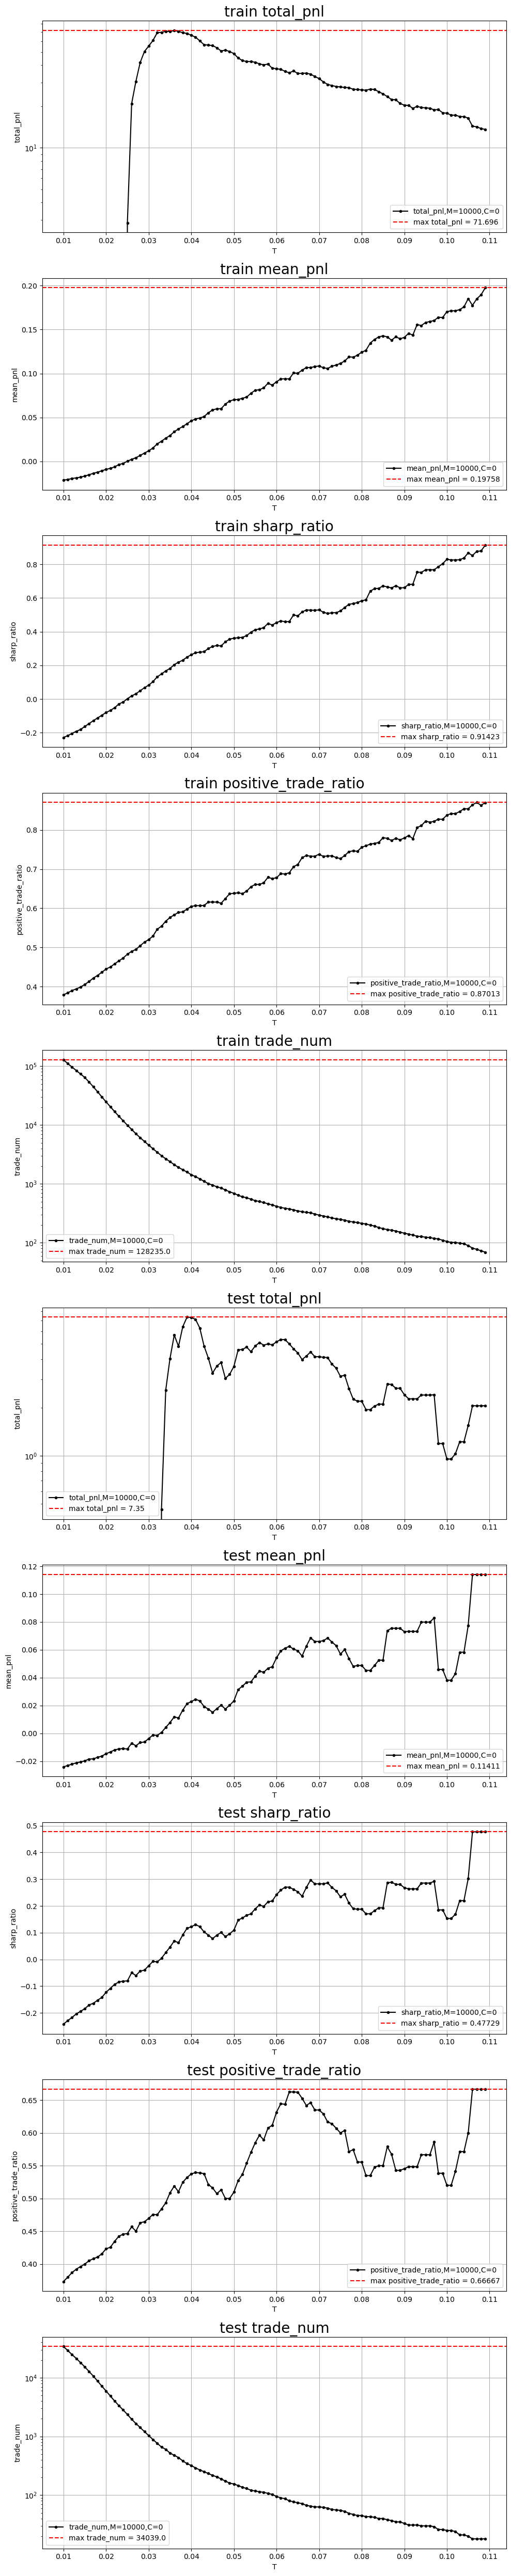

In [468]:
plot_stats(train_stats_list,test_stats_list,['total_pnl','mean_pnl','sharp_ratio','positive_trade_ratio','trade_num'],M=10000,C=0)

## Видим, что ограничение в виде М мешает стратегии совершать больше сделок, которая вероятнее, угадает направление, нежели ошибется. Поэтому в качестве М оставим наибольшее число в виде 10000.

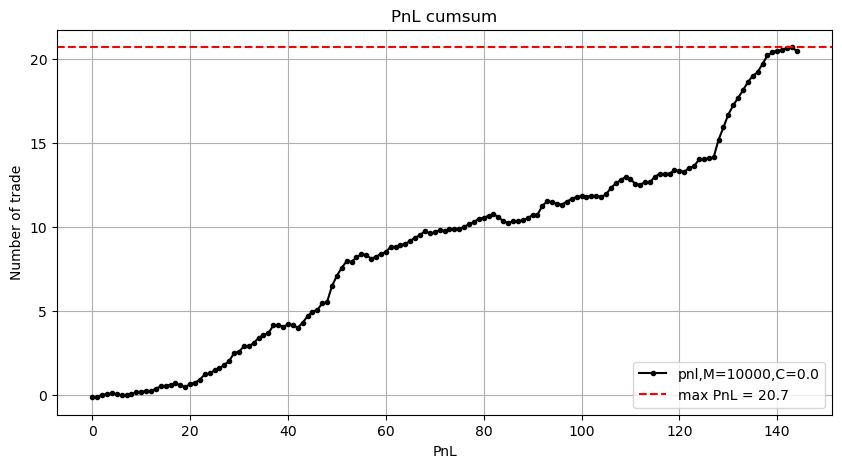

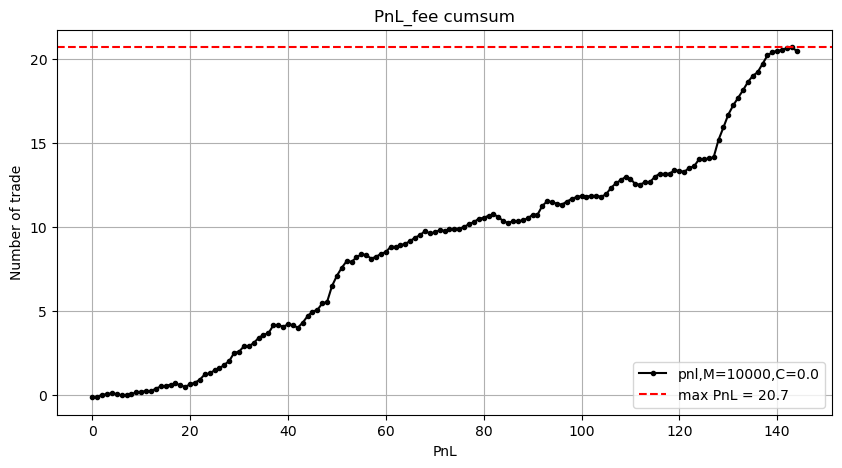

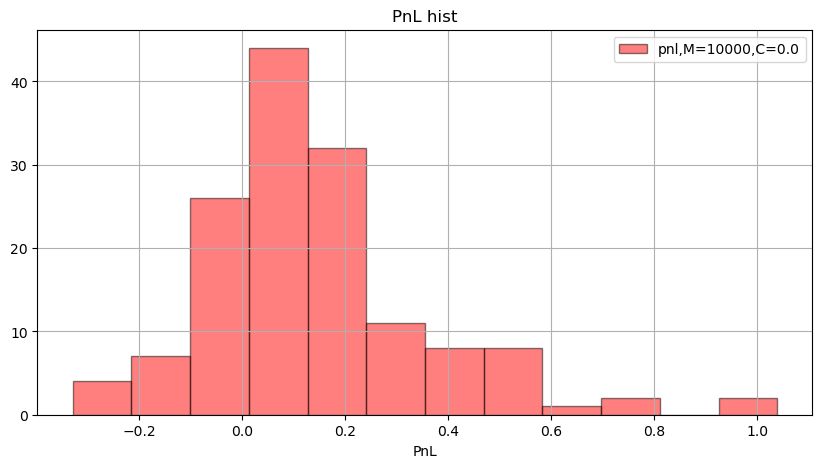

In [518]:
for i in range(3):
    plot_step_3(i + 1,df_tr[['ask_price','bid_price']],df_tr.pred,T=0.09,M=10000,C=0.)

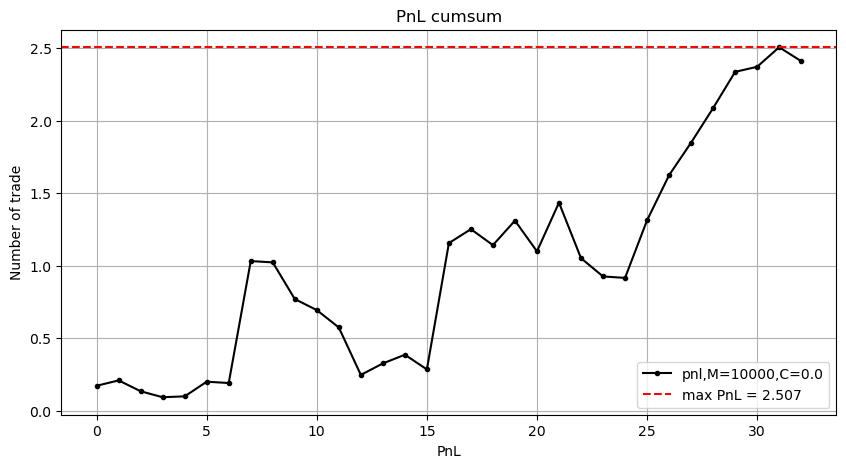

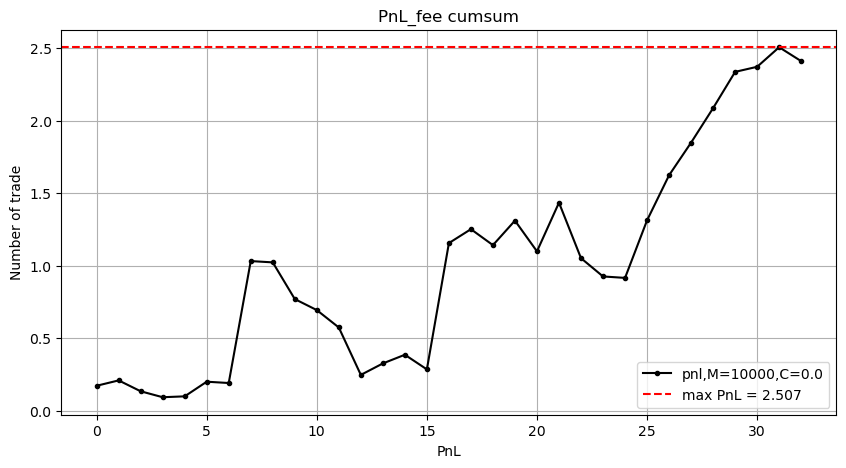

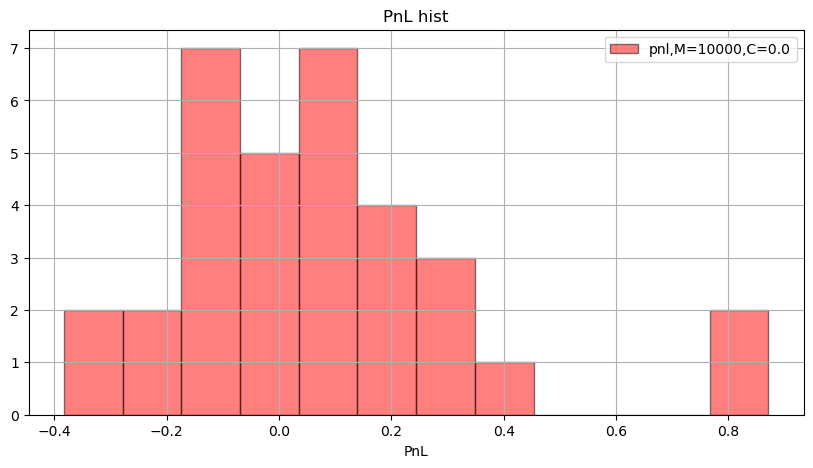

In [502]:
for i in range(3):
    plot_step_3(i + 1,df_tt[['ask_price','bid_price']],df_tt.pred,T=0.09,M=10000,C=0.)

## Проверим нашу стратегию на публичном датасете.

In [506]:
step_2_v4(df_ot[['ask_price','bid_price']],df_ot.pred,T=0.09,M=10000,C=0)

{'total_pnl': 2.829,
 'mean_pnl': 0.02482,
 'std_pnl': 0.21261,
 'sharp_ratio': 0.11672,
 'volume': 6995.269,
 'trade_num': 114.0,
 'positive_trade_ratio': 0.55263,
 'max_drop_down': 1.647}

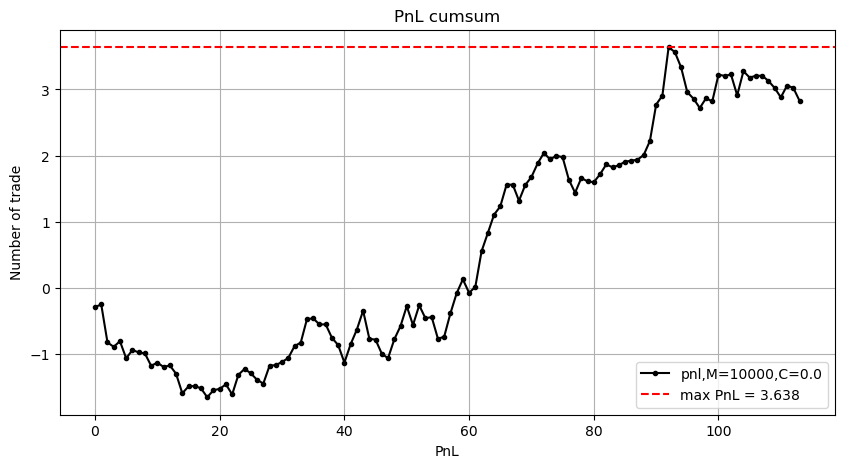

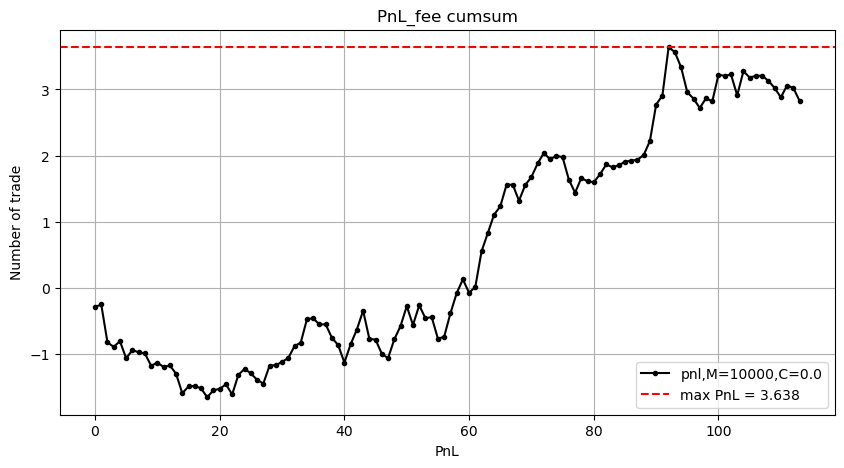

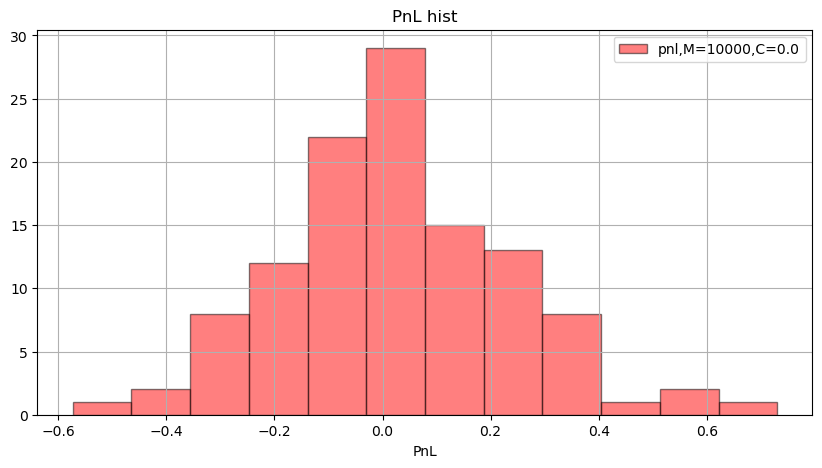

In [503]:
for i in range(3):
    plot_step_3(i + 1,df_ot[['ask_price','bid_price']],df_ot.pred,T=0.09,M=10000,C=0.)

## Результат хуже, чем на тесте, но зато все еще положительный.
## Попробуем поставить сразу большую комиссию в виде 7 б.п.

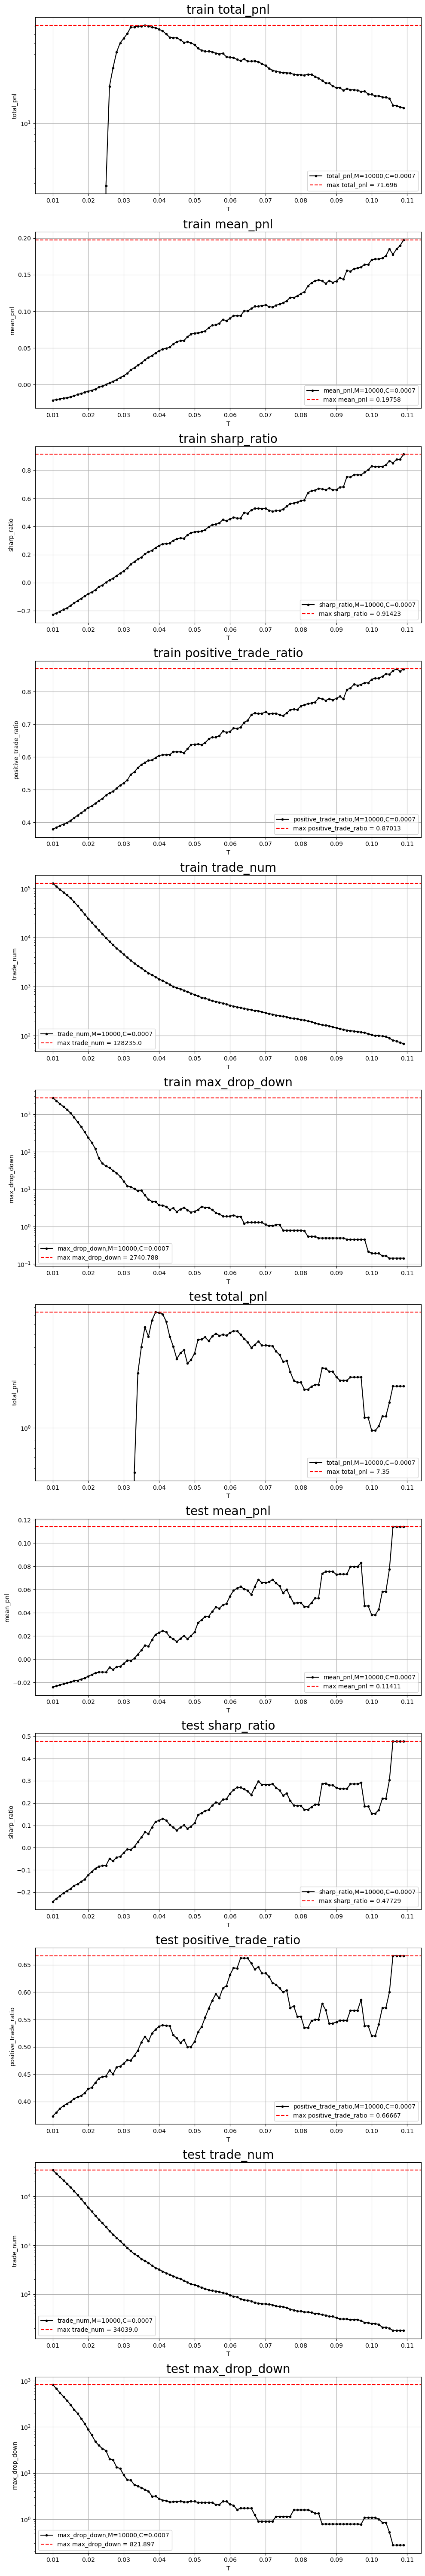

In [509]:
plot_stats(train_stats_list,test_stats_list,['total_pnl','mean_pnl','sharp_ratio','positive_trade_ratio','trade_num',\
                                            'max_drop_down'],M=10000,C=0.07/100)

## Возьмем в качестве оптимальных параметров значения из предыдущего пункта.

In [512]:
step_2_v4(df_tr[['ask_price','bid_price']],df_tr.pred,T=0.09,M=10000,C=0.07/100)

{'total_pnl': 13.1872,
 'mean_pnl': 0.09095,
 'std_pnl': 0.21433,
 'sharp_ratio': 0.42434,
 'volume': 10402.565,
 'trade_num': 145.0,
 'positive_trade_ratio': 0.63448,
 'max_drop_down': 0.71376}

In [513]:
step_2_v4(df_tt[['ask_price','bid_price']],df_tt.pred,T=0.09,M=10000,C=0.07/100)

{'total_pnl': 0.80021,
 'mean_pnl': 0.02425,
 'std_pnl': 0.27354,
 'sharp_ratio': 0.08865,
 'volume': 2301.131,
 'trade_num': 33.0,
 'positive_trade_ratio': 0.45455,
 'max_drop_down': 1.21068}

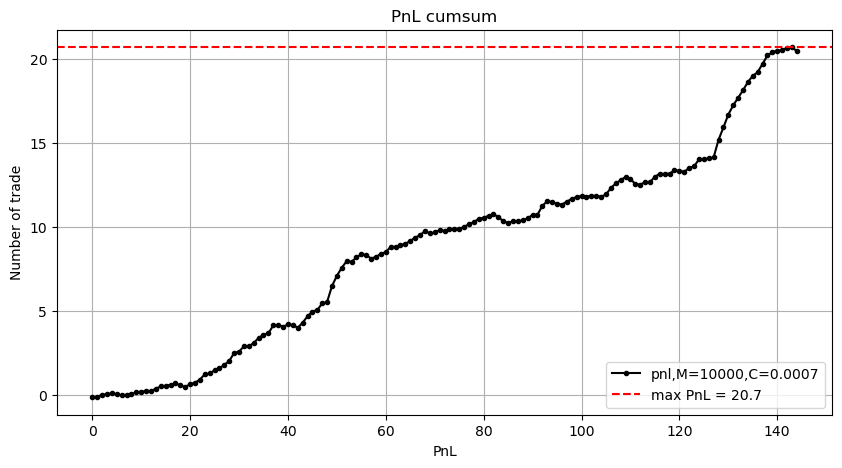

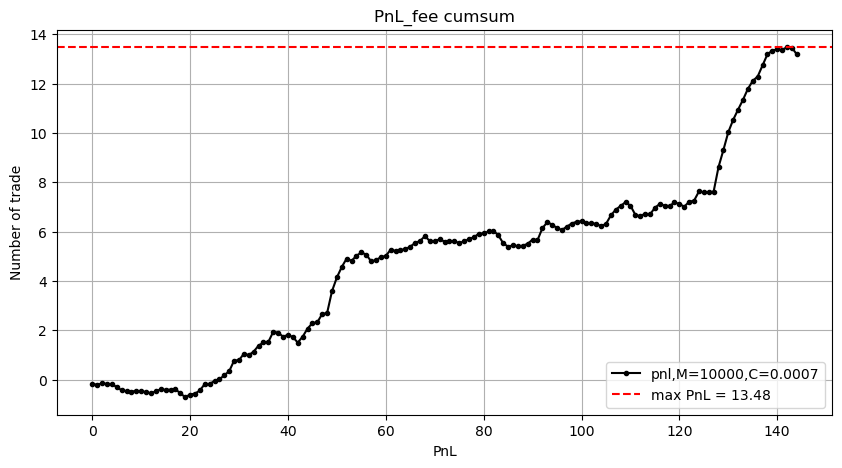

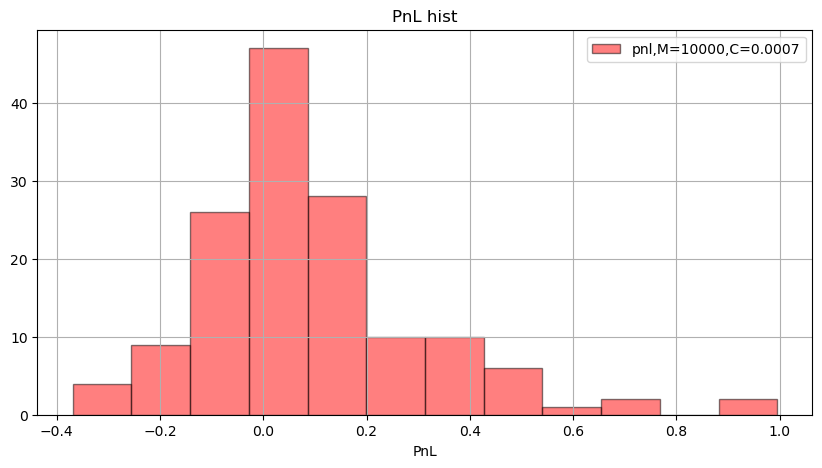

In [521]:
for i in range(3):
    plot_step_3(i + 1,df_tr[['ask_price','bid_price']],df_tr.pred,T=0.09,M=10000,C=0.07/100)

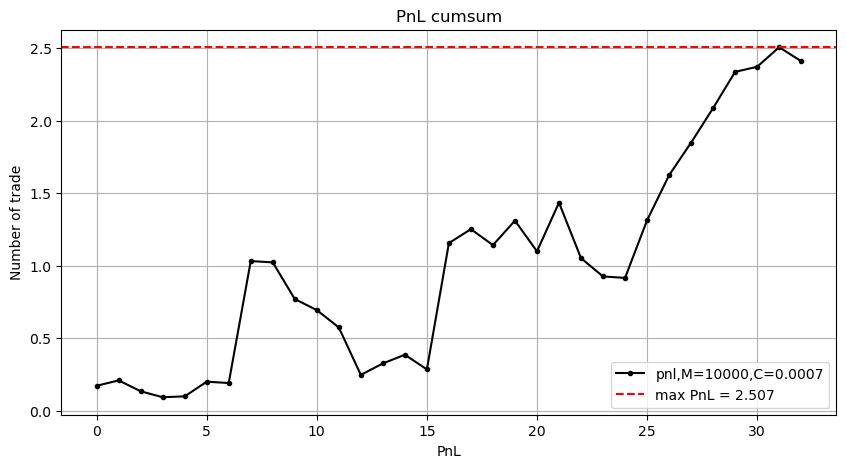

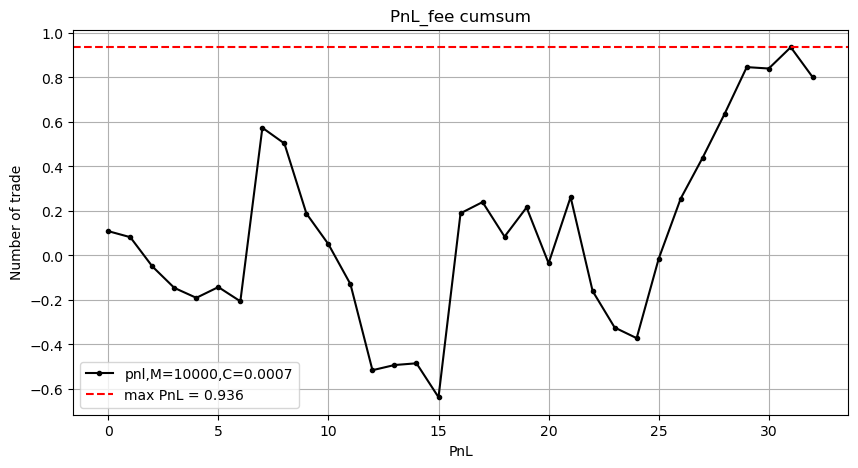

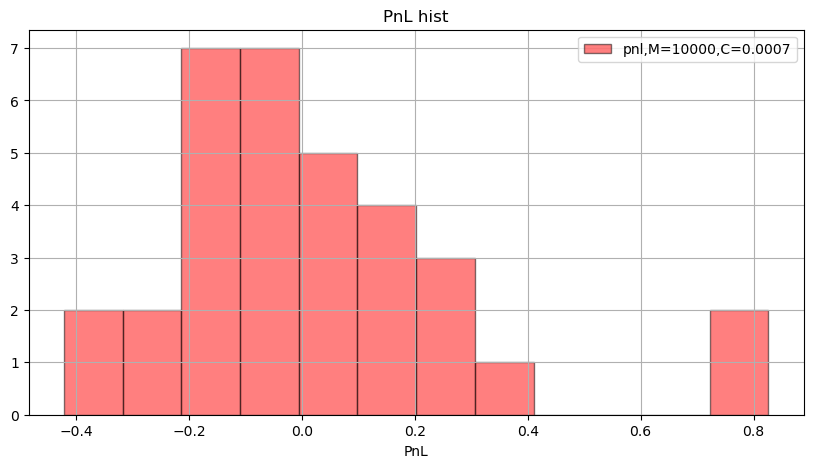

In [522]:
for i in range(3):
    plot_step_3(i + 1,df_tt[['ask_price','bid_price']],df_tt.pred,T=0.09,M=10000,C=0.07/100)